In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 8
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('/home/vivek/Documents/Data_Science/Data_Sets/Electricity/HomeA/2016/HomeA-meter4_2016.csv')
print data.head()

           Date & Time  use [kW]  gen [kW]  KitchenDenLights [kW]  \
0  2016-01-01 00:00:00       0.0       0.0               0.007658   
1  2016-01-01 00:15:00       0.0       0.0               0.007607   
2  2016-01-01 00:30:00       0.0       0.0               0.007591   
3  2016-01-01 00:45:00       0.0       0.0               0.007613   
4  2016-01-01 01:00:00       0.0       0.0               0.007593   

   MasterBedBathLights [kW]  MasterOutlets [kW]  DenOutdoorLights [kW]  \
0                  0.021299            0.021406               0.000456   
1                  0.004709            0.021479               0.000487   
2                  0.004656            0.020737               0.000480   
3                  0.004643            0.020870               0.000496   
4                  0.004641            0.020090               0.000494   

   DenOutlets [kW]  RearBasementLights [kW]  KitchenOutletsEast [kW]  \
0         0.002296                 0.001924                 0.003860

In [20]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('/home/vivek/Documents/Data_Science/Data_Sets/Electricity/HomeA/2016/HomeA-meter2_2016.csv', parse_dates=['Date & Time'], index_col='Date & Time',date_parser=dateparse, nrows=2880)
#print data.head()
len(data)

2880

In [21]:
ts=data['FurnaceHRV [kW]']
ts.tail()

Date & Time
2016-02-29 21:30:00    0.152466
2016-02-29 22:00:00    0.099901
2016-02-29 22:30:00    0.116957
2016-02-29 23:00:00    0.137816
2016-02-29 23:30:00    0.101119
Name: FurnaceHRV [kW], dtype: float64

In [5]:
ts['2016'].head()

Date & Time
2016-01-01 00:00:00    0.007658
2016-01-01 00:15:00    0.007607
2016-01-01 00:30:00    0.007591
2016-01-01 00:45:00    0.007613
2016-01-01 01:00:00    0.007593
Name: KitchenDenLights [kW], dtype: float64

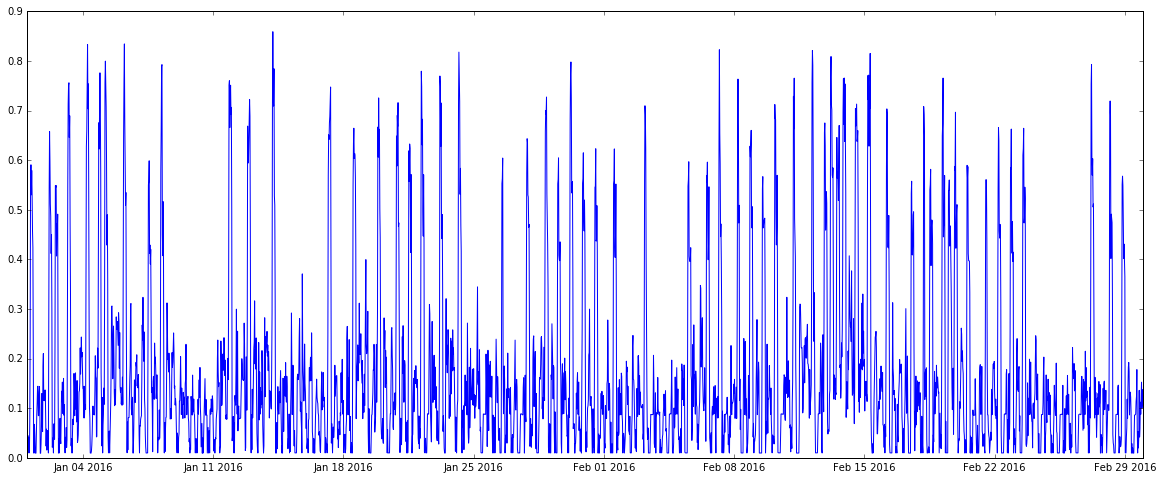

In [37]:
plt.plot(ts)

In [23]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


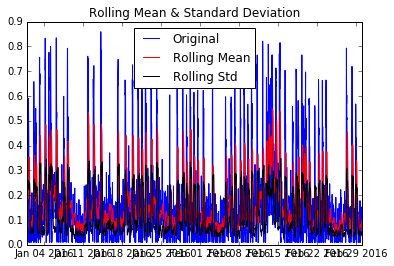

Results of Dickey-Fuller Test:
Test Statistic                -7.181392e+00
p-value                        2.644200e-10
#Lags Used                     2.800000e+01
Number of Observations Used    2.851000e+03
Critical Value (5%)           -2.862554e+00
Critical Value (1%)           -3.432646e+00
Critical Value (10%)          -2.567310e+00
dtype: float64


In [28]:
test_stationarity(ts)

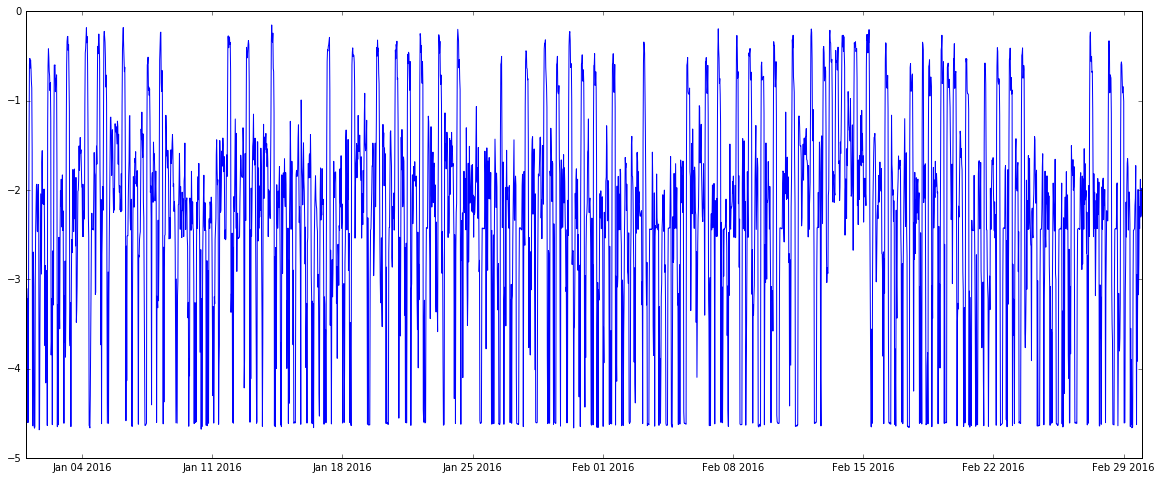

In [38]:
ts_log = np.log(ts)
plt.plot(ts_log)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


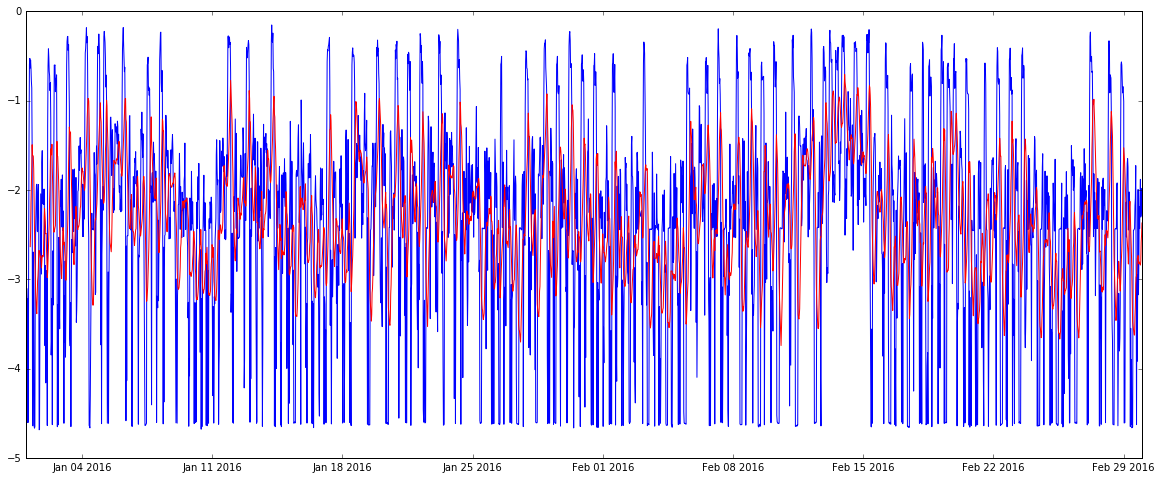

In [39]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [40]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date & Time
2016-01-01 00:00:00         NaN
2016-01-01 00:30:00         NaN
2016-01-01 01:00:00         NaN
2016-01-01 01:30:00         NaN
2016-01-01 02:00:00         NaN
2016-01-01 02:30:00         NaN
2016-01-01 03:00:00         NaN
2016-01-01 03:30:00         NaN
2016-01-01 04:00:00         NaN
2016-01-01 04:30:00         NaN
2016-01-01 05:00:00         NaN
2016-01-01 05:30:00    2.000623
Name: FurnaceHRV [kW], dtype: float64

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


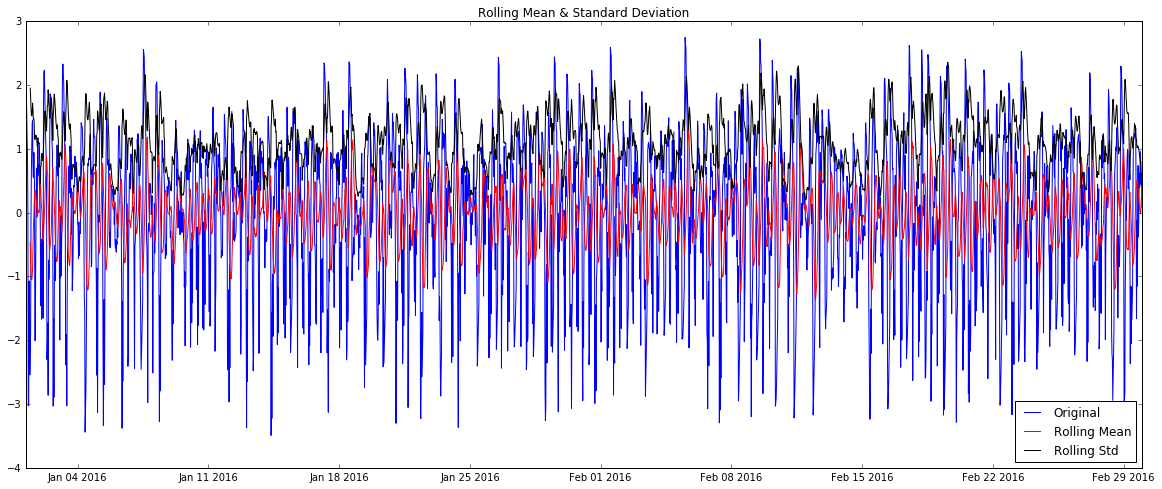

Results of Dickey-Fuller Test:
Test Statistic                -1.706535e+01
p-value                        7.893615e-30
#Lags Used                     2.500000e+01
Number of Observations Used    2.843000e+03
Critical Value (5%)           -2.862557e+00
Critical Value (1%)           -3.432652e+00
Critical Value (10%)          -2.567311e+00
dtype: float64


In [41]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


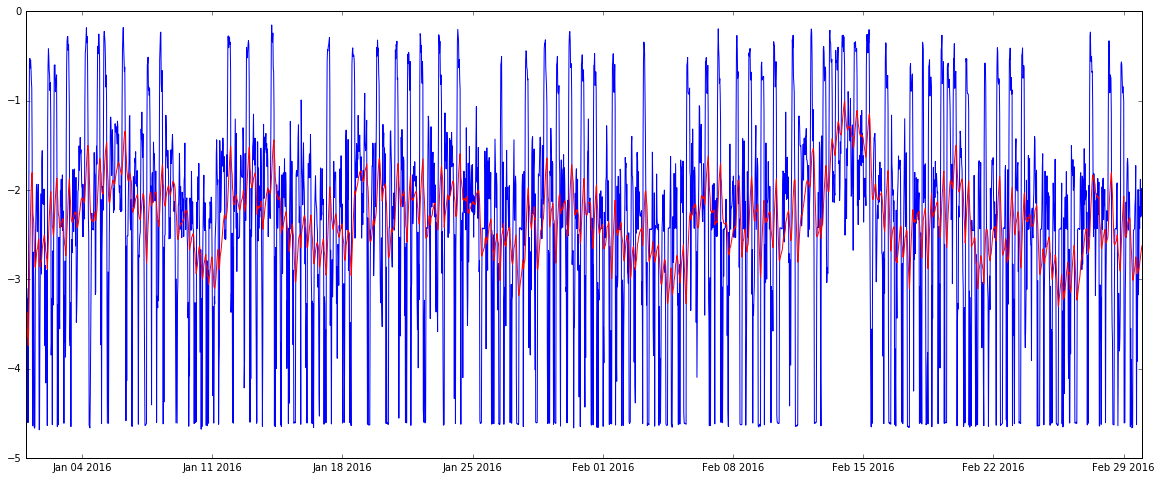

In [42]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


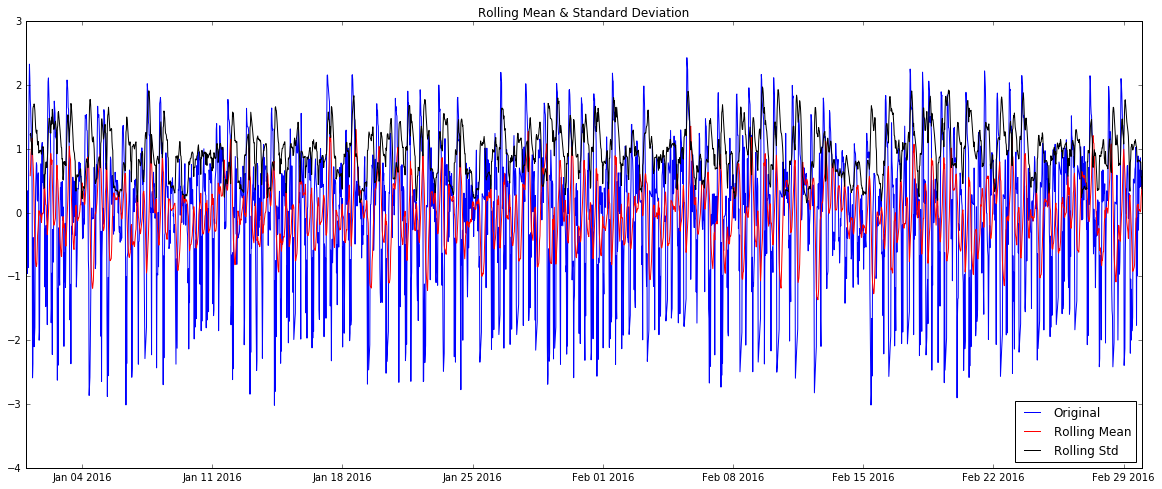

Results of Dickey-Fuller Test:
Test Statistic                -1.429566e+01
p-value                        1.253759e-26
#Lags Used                     2.500000e+01
Number of Observations Used    2.854000e+03
Critical Value (5%)           -2.862553e+00
Critical Value (1%)           -3.432643e+00
Critical Value (10%)          -2.567309e+00
dtype: float64


In [43]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

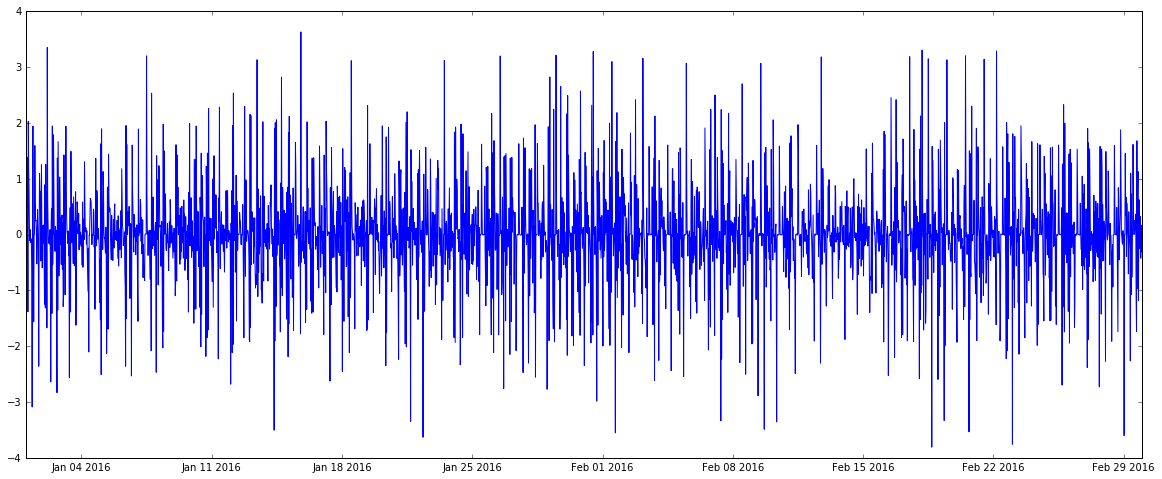

In [44]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


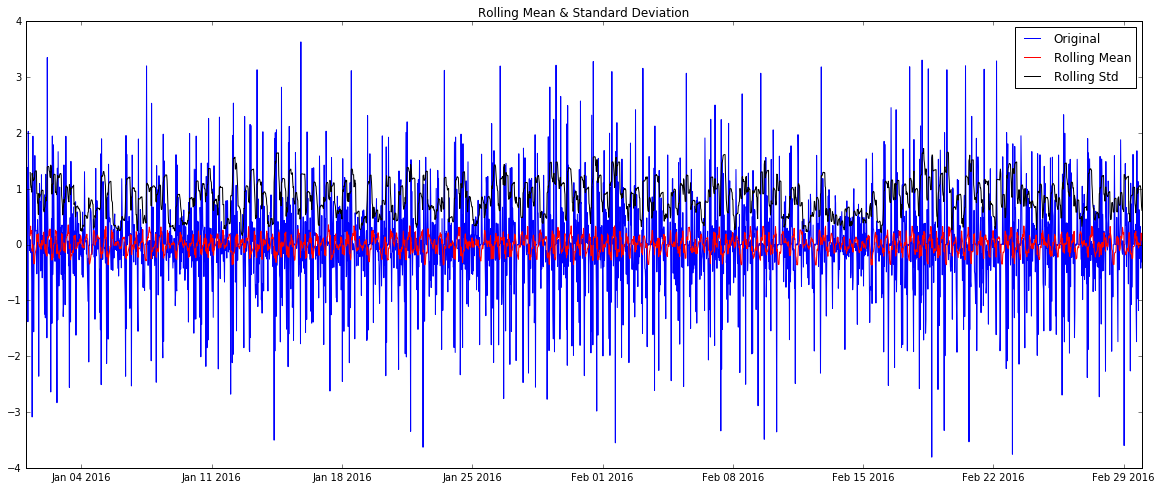

Results of Dickey-Fuller Test:
Test Statistic                  -19.976442
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    2850.000000
Critical Value (5%)              -2.862555
Critical Value (1%)              -3.432647
Critical Value (10%)             -2.567310
dtype: float64


In [45]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

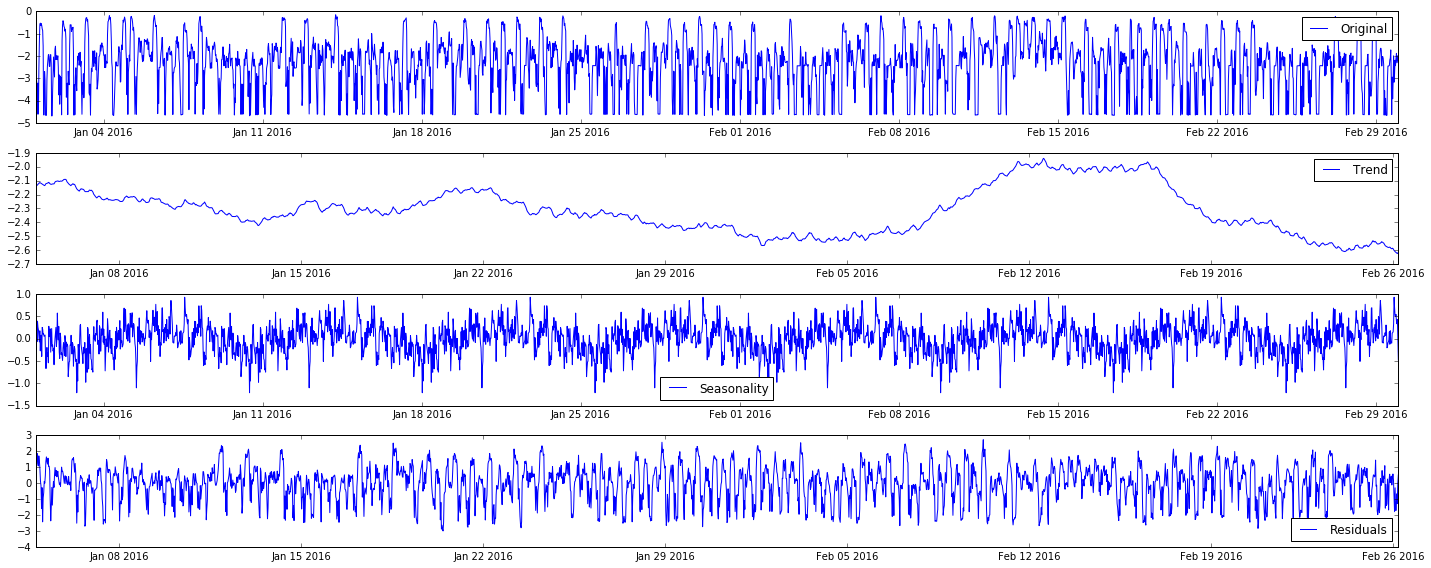

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log,freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


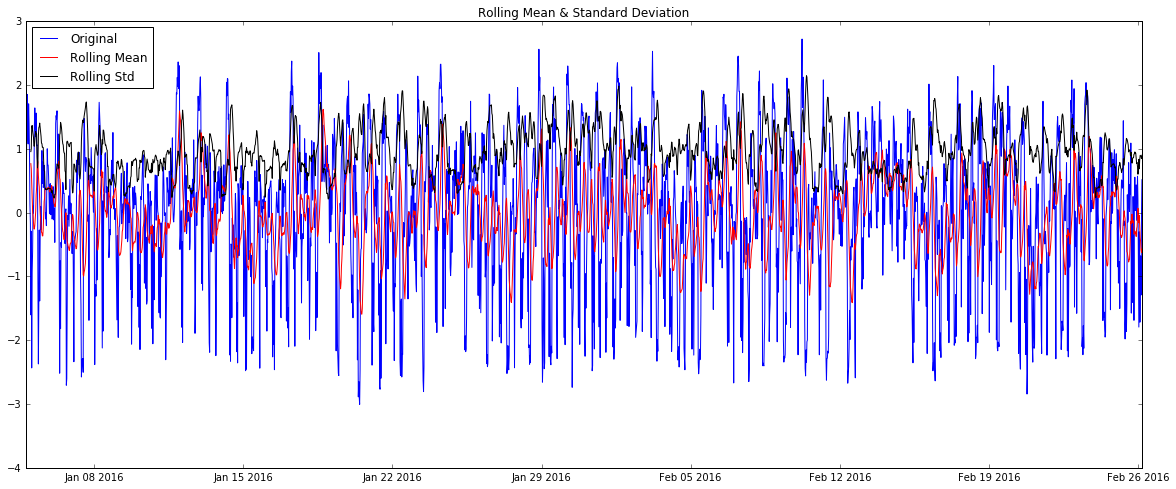

Results of Dickey-Fuller Test:
Test Statistic                -8.827043e+00
p-value                        1.811746e-14
#Lags Used                     2.600000e+01
Number of Observations Used    2.489000e+03
Critical Value (5%)           -2.862702e+00
Critical Value (1%)           -3.432980e+00
Critical Value (10%)          -2.567389e+00
dtype: float64


In [52]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [53]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [54]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')



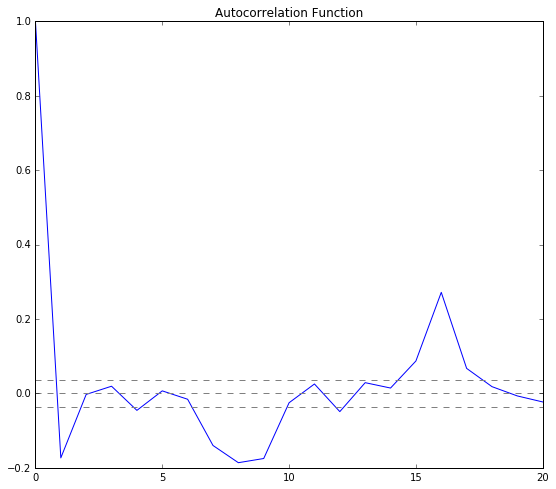

In [55]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

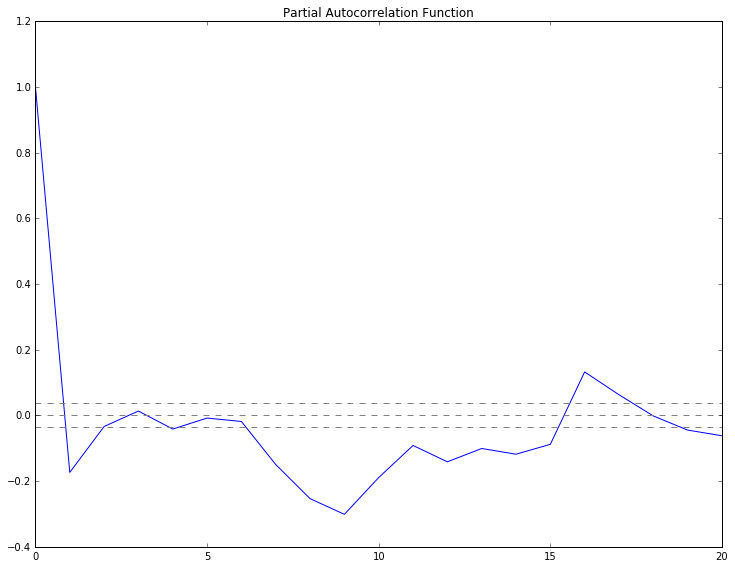

In [56]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [57]:
from statsmodels.tsa.arima_model import ARIMA

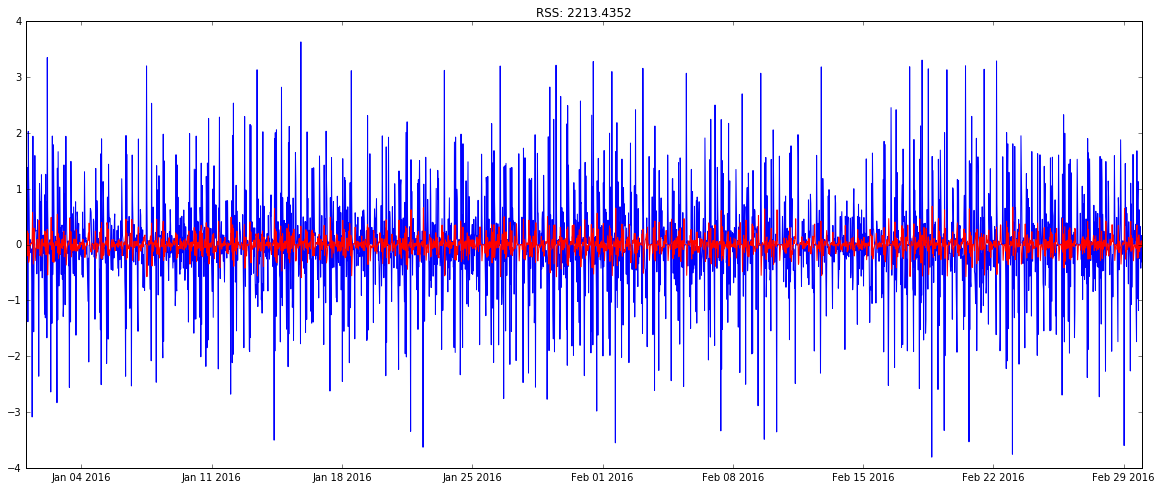

In [58]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

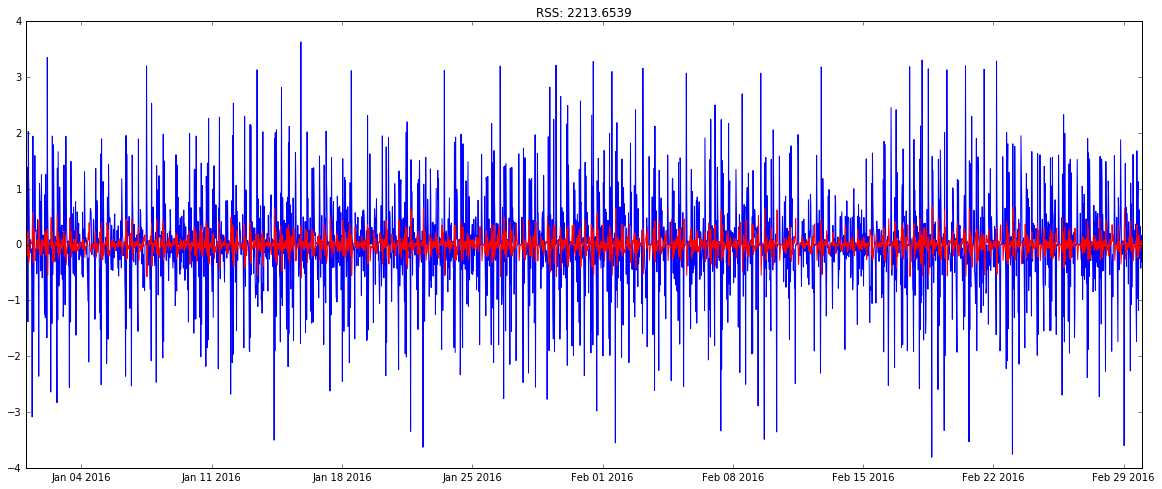

In [59]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


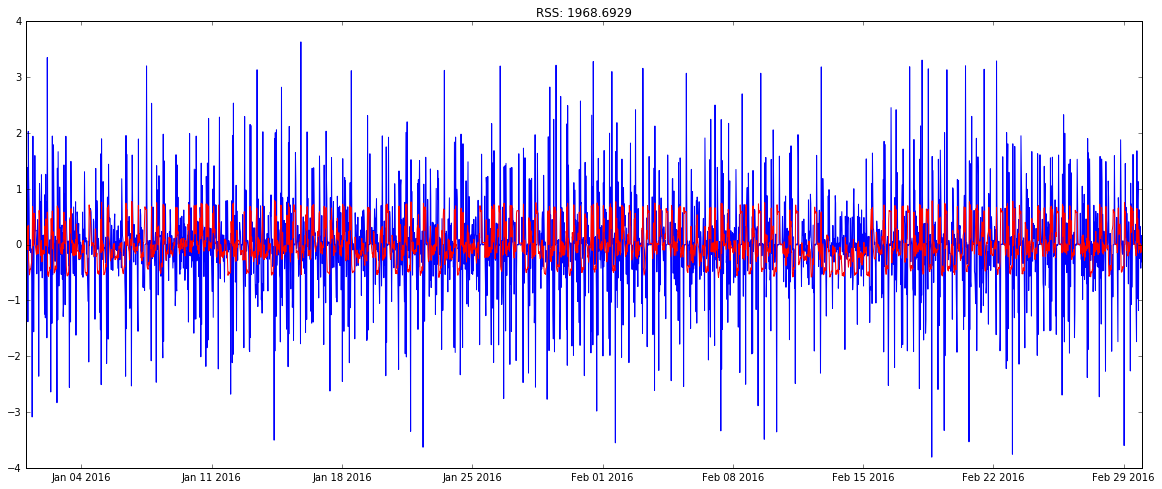

In [60]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [61]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date & Time
2016-01-01 00:30:00   -0.000070
2016-01-01 01:00:00    0.390423
2016-01-01 01:30:00   -0.095160
2016-01-01 02:00:00    0.085623
2016-01-01 02:30:00    0.318470
dtype: float64


In [62]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date & Time
2016-01-01 00:30:00   -0.000070
2016-01-01 01:00:00    0.390353
2016-01-01 01:30:00    0.295194
2016-01-01 02:00:00    0.380816
2016-01-01 02:30:00    0.699287
dtype: float64


In [63]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date & Time
2016-01-01 00:00:00   -2.475253
2016-01-01 00:30:00   -2.475323
2016-01-01 01:00:00   -2.084900
2016-01-01 01:30:00   -2.180060
2016-01-01 02:00:00   -2.094437
dtype: float64

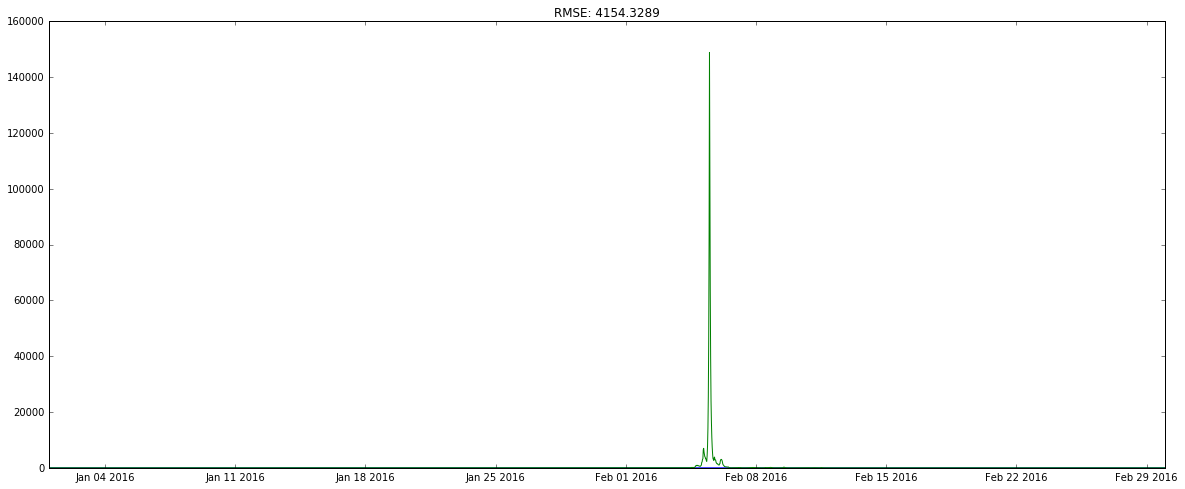

In [64]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))